#### **1.准备工作：在Python中安装OpenCV包**
#### **2.导入必要的模块（OpenCV、numpy、matplotlib等）**
#### **3.使用OpenCV读取一张彩色图像，分析这张图像的分辨率、颜色通道等属性**
#### **4.使用matplotlib显示这张图像**

In [1]:
# 1
# cv2 是 OpenCV 库，用于图像和视频处理。
# matplotlib.pyplot 是用于绘图和可视化的库，常用于显示图像和绘制图表。
import cv2
import matplotlib.pyplot as plt
import numpy as np

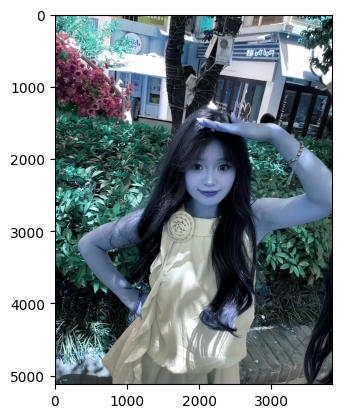

In [2]:
# 4
img_path = r"F:\Source-code-management-repository\MyHome\Machine vision\Data\ai_repair_20250709003842879.jpg"
img = cv2.imread(img_path, 1)
plt.imshow(img)

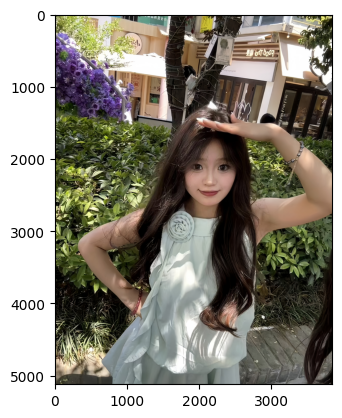

In [3]:
# RGB
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [4]:
# 分离RGB通道,符合通道颜色越白越亮的习惯（0，0，0）
r_channel = RGB_img.copy()
r_channel[:, :, 1] = 0  # 关闭绿色通道
r_channel[:, :, 2] = 0  # 关闭蓝色通道
r_channel[:, :, 0] = r_channel[:, :, 0]  # 保留红色通道

g_channel = RGB_img.copy()
g_channel[:, :, 0] = 0  # 关闭红色通道
g_channel[:, :, 2] = 0  # 关闭蓝色通道
g_channel[:, :, 1] = g_channel[:, :, 1]  # 保留绿色通道

b_channel = RGB_img.copy()
b_channel[:, :, 0] = 0  # 关闭红色通道
b_channel[:, :, 1] = 0  # 关闭绿色通道
b_channel[:, :, 2] = b_channel[:, :, 2]  # 保留蓝色通道


In [ ]:
plt.imshow(r_channel)

In [ ]:
plt.imshow(g_channel)

In [ ]:
plt.imshow(b_channel)

#### **5.将这张图像从RGB颜色空间转为Lab颜色空间，并显示Lab各个颜色通道**

In [ ]:
# 5
Lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
plt.imshow(Lab_img)



In [ ]:
# 将Lab各个颜色通道分离，符合通道颜色越白越亮的习惯（0，0，0）
l_channel = Lab_img.copy()
l_channel[:, :, 1] = 128  # 关闭a通道
l_channel[:, :, 2] = 128  # 关闭b通道
plt.imshow(l_channel)

In [ ]:
a_channel = Lab_img.copy()
a_channel[:, :, 0] = 128  # 关闭L通道
a_channel[:, :, 2] = 128  # 关闭b通道
plt.imshow(a_channel)

In [ ]:
b_channel = Lab_img.copy()
b_channel[:, :, 0] = 128  # 关闭L通道
b_channel[:, :, 1] = 128  # 关闭a通道
plt.imshow(b_channel)

#### **6.将这张图像从RGB颜色空间转为HSV颜色空间，并显示HSV各个颜色通道**

In [ ]:
# 6
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 显示HSV各个颜色通道，按照通道颜色越白越亮的习惯（0，0，0）
H_channel = hsv_img.copy()
H_channel[:, :, 1] = 0  # 关闭S通道
H_channel[:, :, 2] = 0  # 关闭V通道

S_channel = hsv_img.copy()
S_channel[:, :, 0] = 0  # 关闭H通道
S_channel[:, :, 2] = 0  # 关闭V通道

V_channel = hsv_img.copy()
V_channel[:, :, 0] = 0  # 关闭H通道
V_channel[:, :, 1] = 0  # 关闭S通道

In [ ]:
plt.imshow(H_channel)

In [ ]:
plt.imshow(S_channel)

In [ ]:
plt.imshow(V_channel)

#### **7.尝试调节图像对比度，显示图像调节前后的结果**

In [ ]:
# 7
alpha = 6  # 对比度
adjusted = cv2.convertScaleAbs(img, alpha=alpha)
plt.imshow(adjusted)

#### **8.尝试调节图像亮度，显示图像调节前后的结果**

In [ ]:
# 8
beta = 100
brightened = cv2.convertScaleAbs(img, beta=beta)
plt.imshow(brightened)

#### **9.尝试调节图像饱和度，显示图像调节前后的结果**

In [ ]:
# 饱和度调节
hsv = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2HSV)
hsv = np.array(hsv, dtype=np.float64)
hsv[:, :, 1] = hsv[:, :, 1] * 1.5 
hsv[:, :, 1][hsv[:, :, 1] > 255] = 255  
hsv = np.array(hsv, dtype=np.uint8)
saturated = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
plt.imshow(saturated)

#### **10.对图像进行伽马变换，显示图像变换前后的结果**

In [ ]:
# 使用RGB图像，伽马值调节 
gamma = 2.2
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
gamma_corrected = cv2.LUT(RGB_img, lookUpTable)
plt.imshow(gamma_corrected)